In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [3]:
for i,message in enumerate(messages[:10]):
    print(i,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [4]:
Messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['Label','Message'])

In [5]:
Messages

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


/home/parth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

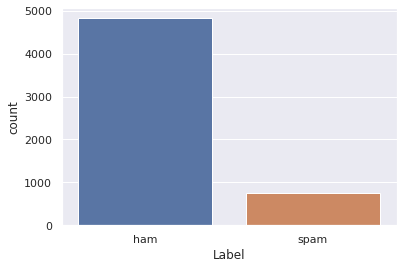

In [6]:
sns.countplot(Messages['Label'])

In [7]:
Messages['Length']=Messages['Message'].apply(len)
print(Messages['Length'])

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: Length, Length: 5572, dtype: int64


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

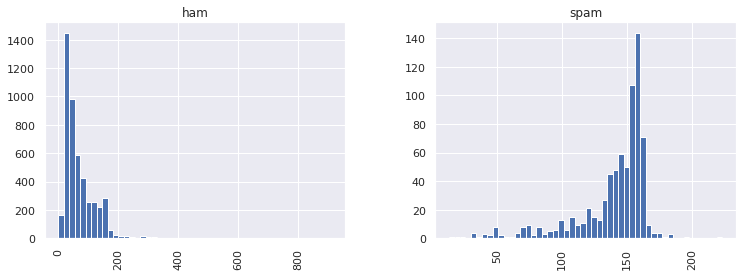

In [8]:
Messages.hist(column='Length',by='Label',bins=50,figsize=(12,4))

# Text Preprocessing

In [9]:
import string 

In [10]:
MESS4=Messages['Message'][4]
print(MESS4)

Nah I don't think he goes to usf, he lives around here though


In [11]:
#remove Punctuations
MESS4=[c for c in MESS4 if c not in string.punctuation]
MESS4

['N',
 'a',
 'h',
 ' ',
 'I',
 ' ',
 'd',
 'o',
 'n',
 't',
 ' ',
 't',
 'h',
 'i',
 'n',
 'k',
 ' ',
 'h',
 'e',
 ' ',
 'g',
 'o',
 'e',
 's',
 ' ',
 't',
 'o',
 ' ',
 'u',
 's',
 'f',
 ' ',
 'h',
 'e',
 ' ',
 'l',
 'i',
 'v',
 'e',
 's',
 ' ',
 'a',
 'r',
 'o',
 'u',
 'n',
 'd',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 't',
 'h',
 'o',
 'u',
 'g',
 'h']

In [12]:
#Join Alphabets
MESS4=''.join(MESS4)
MESS4

'Nah I dont think he goes to usf he lives around here though'

In [13]:
#split words
Mess4=MESS4.split()

In [14]:
#remove Stopwords
from nltk.corpus import stopwords
Mess4=[word for word in MESS4.split() if word.lower() not in stopwords.words('english')]
Mess4
# Now just remove any stopwords
#clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

['Nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']

In [15]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# NLTK Installation Area

In [16]:
!conda install nltk

Solving environment: done

# All requested packages already installed.



In [17]:
import nltk # Imports the library


In [18]:
nltk.download_shell()  

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q



# Vectorization

In [19]:
# Step->1 = Create Bag of words
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
Bow_transform=CountVectorizer(analyzer=text_process).fit(Messages['Message'])

In [21]:
len(Bow_transform.vocabulary_)

11425

In [22]:
#Step->2 = Create Matrix
Bow_matrix=Bow_transform.transform(Messages['Message'])

In [23]:
Bow_matrix.shape

(5572, 11425)

# TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_Tranformer=TfidfTransformer().fit(Bow_matrix)
tfidf=tfidf_Tranformer.transform(Bow_matrix)

# Split the data

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Messages['Message'],Messages['Label'],test_size=0.30,random_state=101)

# Pipeline creation

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('Bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classification',MultinomialNB())
])

In [31]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('Bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f36bf31fc10>)),
                ('tfidf', TfidfTransformer()),
                ('classification', MultinomialNB())])

In [32]:
prediction=pipeline.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
print(confusion_matrix(Y_test,prediction))
print(classification_report(Y_test,prediction))

[[1475    0]
 [  68  129]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.96      1672

